# Reducing Recidivism in Iowa

* Name: James M. Irving, Ph.D.
* Email: james.irving.phd@gmail.com


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

In [1]:
# from IPython import display as dp
# with open('OSEMN.md') as f:
#     dp.display(dp.Markdown(f.read()))

# INTRODUCTION

> - This project is intended to help address Iowa's Prisoner Recidivism problem, by using several machine learning classification models. 

> - We will predict whether a released prisoner will return to a life of crime and be back in prison within 3 years



# OBTAIN

- Data is From Iowa Department of Corrections:
    - https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4
    
- Direct Export Download Link:
    - https://data.iowa.gov/api/views/mw8r-vqy4/rows.csv?accessType=DOWNLOAD&api_foundry=true
    
    
- IOWA DATA API [To Do]
    - Documentation:
        - https://dev.socrata.com/foundry/data.iowa.gov/mw8r-vqy4
    - Iowa API url = https://data.iowa.gov/resource/mw8r-vqy4.csv

In [2]:
# !pip install -U fsds
from fsds.imports import *
plt.style.use('seaborn-talk')

fsds v0.2.25 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
## DOWNLOAD DATASET
url = "https://data.iowa.gov/api/views/mw8r-vqy4/rows.csv?accessType=DOWNLOAD&api_foundry=true"
df = pd.read_csv(url) 
df.to_csv('data/iowa_prisoners_2020.csv')
df

,Fiscal Year Released,Recidivism Reporting Year,Main Supervising District,Release Type,Race - Ethnicity,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,Target Population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.0,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.0,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.0,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.0,Tech,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,NaN,Paroled to Detainer - INS,White - Hispanic,Under 25,Male,C Felony,Violent,Assault,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
26016,2015,2018,6JD,Released to Special Sentence,White - Non-Hispanic,35-44,Male,C Felony,Violent,Sex,No,NaN,No Recidivism,NaN,NaN,NaN,No
26017,2015,2018,5JD,Parole Granted,White - Non-Hispanic,25-34,Female,Aggravated Misdemeanor,Public Order,Traffic,No,NaN,No Recidivism,NaN,NaN,NaN,No
26018,2015,2018,5JD,Paroled w/Immediate Discharge,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,No,NaN,No Recidivism,NaN,NaN,NaN,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year Released        26020 non-null  int64  
 1   Recidivism Reporting Year   26020 non-null  int64  
 2   Main Supervising District   16439 non-null  object 
 3   Release Type                24258 non-null  object 
 4   Race - Ethnicity            25990 non-null  object 
 5   Age At Release              26017 non-null  object 
 6   Sex                         26017 non-null  object 
 7   Offense Classification      26020 non-null  object 
 8   Offense Type                26020 non-null  object 
 9   Offense Subtype             26020 non-null  object 
 10  Return to Prison            26020 non-null  object 
 11  Days to Return              8681 non-null   float64
 12  Recidivism Type             26020 non-null  object 
 13  New Offense Classification  671

### Notes:

- Target = `Return to Prison`(Yes/No) -> `Recidivist` (0,1)

**Columns to remove:**
- Any columns that contain information about the new crime committed by recidivists.
    - New Offense Classification
    - New Offense Type 
    - New Offense Sub Type 
- Recidivism Reporting Year (only care about Year Released)

In [5]:
## Dropping Columns Related to New Crimes (for recidivists)
drop_cols = [col for col in df.columns if 'New' in col]
drop_cols.extend(['Days to Return','Recidivism Type'])

## Removing 
drop_cols.extend([col for col in df.columns if 'Year' in col])#('Recidivism Reporting Year')
drop_cols

['New Offense Classification',
 'New Offense Type',
 'New Offense Sub Type',
 'Days to Return',
 'Recidivism Type',
 'Fiscal Year Released',
 'Recidivism Reporting Year']

In [6]:
df.drop(columns=drop_cols,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Main Supervising District  16439 non-null  object
 1   Release Type               24258 non-null  object
 2   Race - Ethnicity           25990 non-null  object
 3   Age At Release             26017 non-null  object
 4   Sex                        26017 non-null  object
 5   Offense Classification     26020 non-null  object
 6   Offense Type               26020 non-null  object
 7   Offense Subtype            26020 non-null  object
 8   Return to Prison           26020 non-null  object
 9   Target Population          26020 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


# SCRUB

<AxesSubplot:>

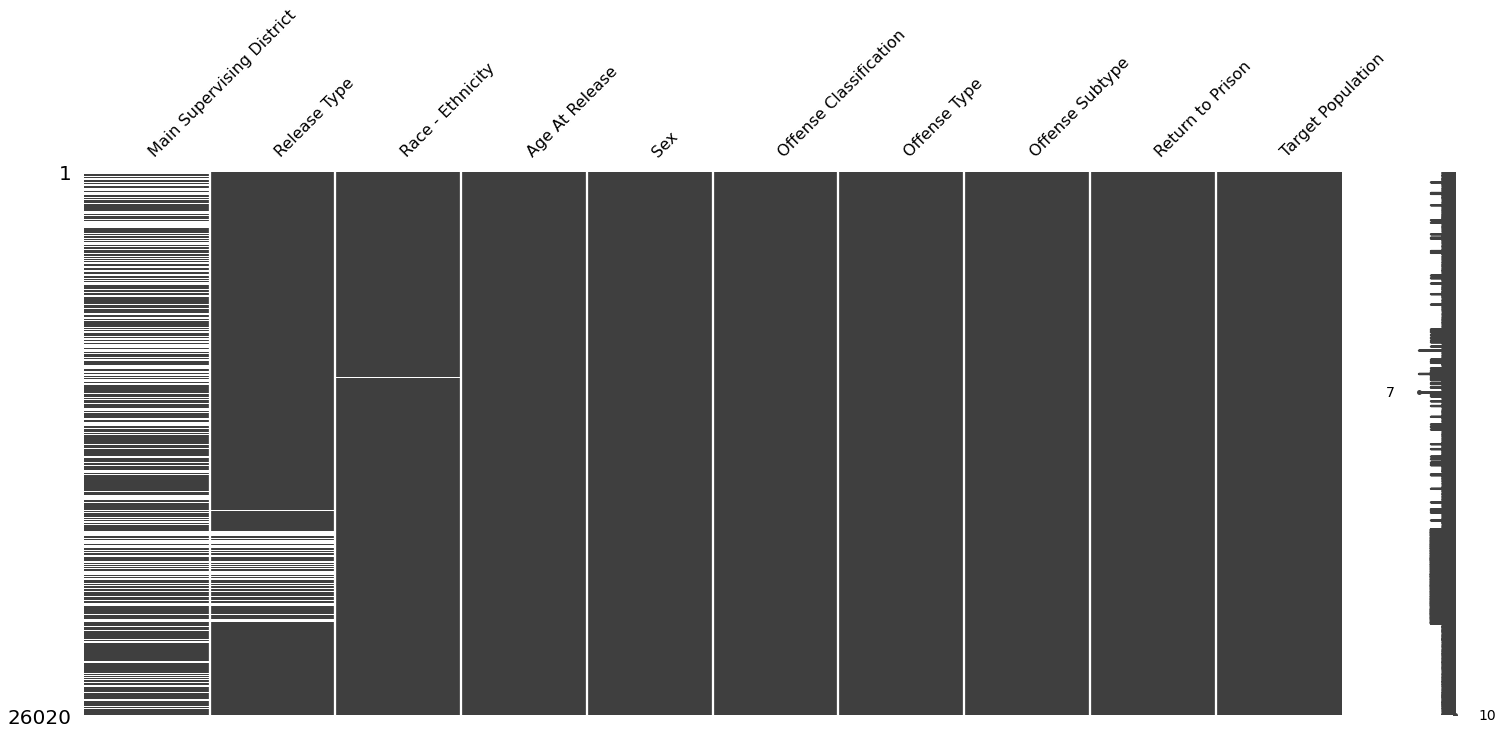

In [7]:
import missingno as ms
ms.matrix(df)

In [8]:
print('\t% Null Values')
nulls= df.isna().sum()
nulls_only = nulls[nulls > 0] 
print((nulls_only/ len(df)*100).round(2))

	% Null Values
Main Supervising District    36.82
Release Type                  6.77
Race - Ethnicity              0.12
Age At Release                0.01
Sex                           0.01
dtype: float64


In [9]:
null_cols = nulls_only.index.tolist()
null_cols

['Main Supervising District',
 'Release Type',
 'Race - Ethnicity',
 'Age At Release ',
 'Sex']

In [10]:
def check_counts(df,col,normalize=True,return_=False):
    """Helper function to display value counts (including NaN)"""
    counts = df[col].value_counts(normalize=normalize,dropna=False)
    
    ## Make % 
    if normalize:
        counts = (counts*100).round(2)
    if return_:
        return counts
    else:
        
        print(f"There are {df[col].nunique()} unique values in {col}")
        display(counts)  

def plot_values(df, col,fill_val= "NaN",ax=None,show=True):
    """Plot a seaborn catplot of the categories in col."""
    data = df[[col]].fillna(fill_val).copy()
    counts = data[col].value_counts(ascending=False,dropna=False)
#     display(counts)
    
    ax = sns.countplot(data=data,y=col,
                  order=counts.index,ax=ax)
    ax.set(title=f"Value Counts for {col}")
    if show:
        plt.show()
    return ax

def check_column(df, col,normalize=True,fill_val= "NaN"):
    """Combined column inspection function."""
    plot_values(df,col,fill_val=fill_val)
    check_counts(df,col,normalize=normalize)

### Scrapped attempt to make table version of function

In [11]:
# vals = check_counts(df,'Main Supervising District',return_=True)
# vals

In [12]:
# fig, ax = plt.subplots(ncols=2,figsize=(10,6))
# plot_values(df,'Main Supervising District',ax=ax[0],show=False);
# pd.plotting.table(ax[1],vals.round(2),loc='upper right')


### Main Supervising Judicial District

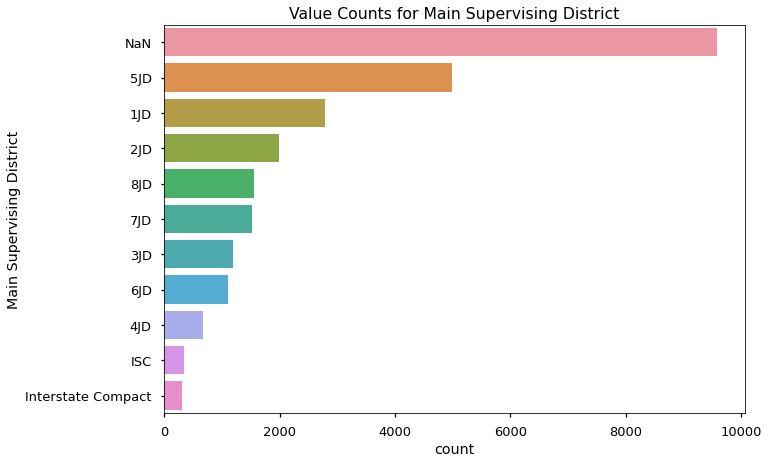

There are 10 unique values in Main Supervising District


NaN                   36.82
5JD                   19.15
1JD                   10.71
2JD                    7.64
8JD                    5.98
7JD                    5.82
3JD                    4.57
6JD                    4.22
4JD                    2.56
ISC                    1.35
Interstate Compact     1.19
Name: Main Supervising District, dtype: float64

In [13]:
check_column(df,null_cols[0])

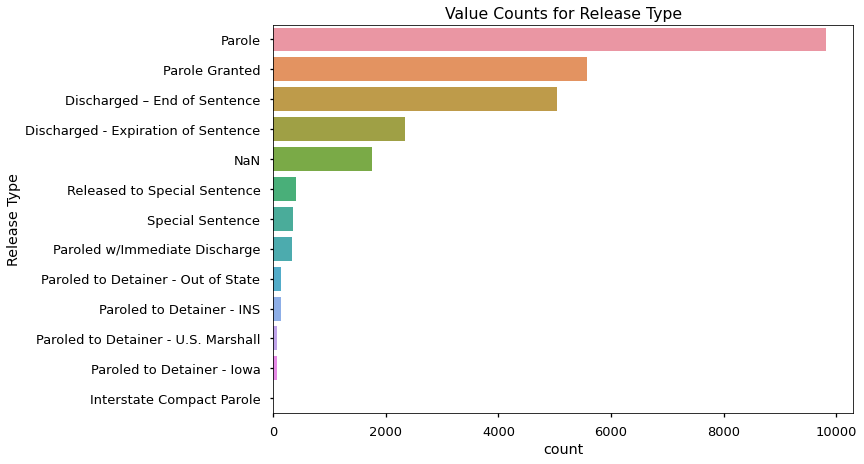

There are 12 unique values in Release Type


Parole                                 37.70
Parole Granted                         21.43
Discharged – End of Sentence           19.37
Discharged - Expiration of Sentence     8.97
NaN                                     6.77
Released to Special Sentence            1.54
Special Sentence                        1.33
Paroled w/Immediate Discharge           1.28
Paroled to Detainer - Out of State      0.53
Paroled to Detainer - INS               0.51
Paroled to Detainer - U.S. Marshall     0.30
Paroled to Detainer - Iowa              0.25
Interstate Compact Parole               0.00
Name: Release Type, dtype: float64

In [14]:
check_column(df,null_cols[1])

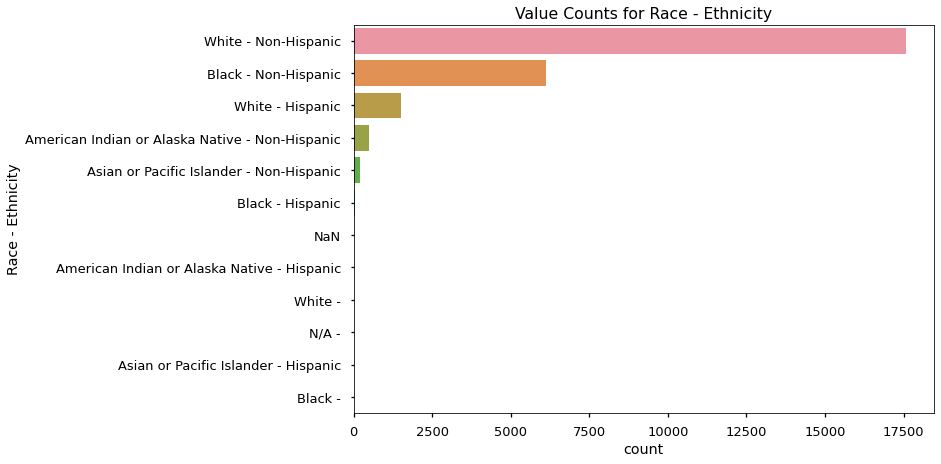

There are 11 unique values in Race - Ethnicity


White - Non-Hispanic                               67.58
Black - Non-Hispanic                               23.48
White - Hispanic                                    5.85
American Indian or Alaska Native - Non-Hispanic     1.93
Asian or Pacific Islander - Non-Hispanic            0.74
Black - Hispanic                                    0.14
NaN                                                 0.12
American Indian or Alaska Native - Hispanic         0.08
White -                                             0.05
N/A -                                               0.02
Asian or Pacific Islander - Hispanic                0.02
Black -                                             0.01
Name: Race - Ethnicity, dtype: float64

In [15]:
check_column(df,null_cols[2])

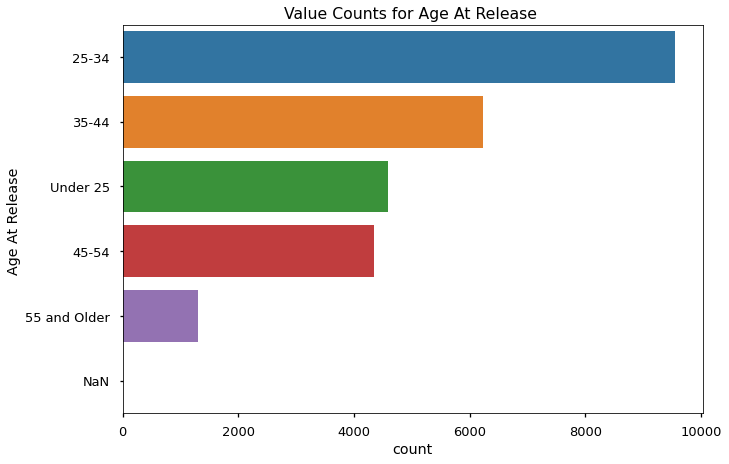

There are 5 unique values in Age At Release 


25-34           36.72
35-44           23.92
Under 25        17.64
45-54           16.71
55 and Older     5.01
NaN              0.01
Name: Age At Release , dtype: float64

In [16]:
check_column(df,null_cols[3])

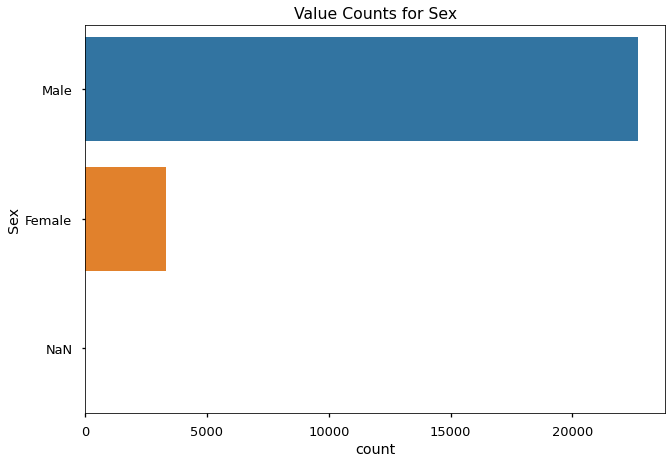

There are 2 unique values in Sex


Male      87.16
Female    12.83
NaN        0.01
Name: Sex, dtype: float64

In [17]:
check_column(df,null_cols[4])

## Handling Null Values

- Main Supervising District: Fill the null values with "MISSING"
- **Release Type** - 6% null values,  impute with "MISSING"
- Race - Ethnicity: 0.12 % - very few - impute with "MISSING"
- Age At Release: 0.01 % - very few - impute with "MISSING"
- Sex - 0.01 % - very few - impute with "MISSING"

# EXPLORE

In [18]:
## Get list of cat cosl 
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Main Supervising District', 'Release Type', 'Race - Ethnicity',
       'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type',
       'Offense Subtype', 'Return to Prison', 'Target Population'],
      dtype='object')

In [19]:
for col in cat_cols:
    print(f"[i] {col.upper()}")
    display(check_counts(df,col))#check_column(df,col))
    print('---'*30)

[i] MAIN SUPERVISING DISTRICT
There are 10 unique values in Main Supervising District


NaN                   36.82
5JD                   19.15
1JD                   10.71
2JD                    7.64
8JD                    5.98
7JD                    5.82
3JD                    4.57
6JD                    4.22
4JD                    2.56
ISC                    1.35
Interstate Compact     1.19
Name: Main Supervising District, dtype: float64

None

------------------------------------------------------------------------------------------
[i] RELEASE TYPE
There are 12 unique values in Release Type


Parole                                 37.70
Parole Granted                         21.43
Discharged – End of Sentence           19.37
Discharged - Expiration of Sentence     8.97
NaN                                     6.77
Released to Special Sentence            1.54
Special Sentence                        1.33
Paroled w/Immediate Discharge           1.28
Paroled to Detainer - Out of State      0.53
Paroled to Detainer - INS               0.51
Paroled to Detainer - U.S. Marshall     0.30
Paroled to Detainer - Iowa              0.25
Interstate Compact Parole               0.00
Name: Release Type, dtype: float64

None

------------------------------------------------------------------------------------------
[i] RACE - ETHNICITY
There are 11 unique values in Race - Ethnicity


White - Non-Hispanic                               67.58
Black - Non-Hispanic                               23.48
White - Hispanic                                    5.85
American Indian or Alaska Native - Non-Hispanic     1.93
Asian or Pacific Islander - Non-Hispanic            0.74
Black - Hispanic                                    0.14
NaN                                                 0.12
American Indian or Alaska Native - Hispanic         0.08
White -                                             0.05
N/A -                                               0.02
Asian or Pacific Islander - Hispanic                0.02
Black -                                             0.01
Name: Race - Ethnicity, dtype: float64

None

------------------------------------------------------------------------------------------
[i] AGE AT RELEASE 
There are 5 unique values in Age At Release 


25-34           36.72
35-44           23.92
Under 25        17.64
45-54           16.71
55 and Older     5.01
NaN              0.01
Name: Age At Release , dtype: float64

None

------------------------------------------------------------------------------------------
[i] SEX
There are 2 unique values in Sex


Male      87.16
Female    12.83
NaN        0.01
Name: Sex, dtype: float64

None

------------------------------------------------------------------------------------------
[i] OFFENSE CLASSIFICATION
There are 15 unique values in Offense Classification


D Felony                                    40.30
C Felony                                    26.15
Aggravated Misdemeanor                      18.95
B Felony                                     6.78
Felony - Enhancement to Original Penalty     5.89
Felony - Enhanced                            0.85
Serious Misdemeanor                          0.60
Special Sentence 2005                        0.38
Felony - Mandatory Minimum                   0.04
Other Felony                                 0.02
A Felony                                     0.02
Simple Misdemeanor                           0.01
Sexual Predator Community Supervision        0.01
Other Felony (Old Code)                      0.01
Other Misdemeanor                            0.00
Name: Offense Classification, dtype: float64

None

------------------------------------------------------------------------------------------
[i] OFFENSE TYPE
There are 5 unique values in Offense Type


Drug            30.42
Property        28.33
Violent         22.35
Public Order    13.87
Other            5.03
Name: Offense Type, dtype: float64

None

------------------------------------------------------------------------------------------
[i] OFFENSE SUBTYPE
There are 26 unique values in Offense Subtype


Trafficking                        24.95
Assault                            12.26
Burglary                           11.40
Theft                              10.30
OWI                                 6.89
Sex                                 4.91
Forgery/Fraud                       4.65
Other Criminal                      4.58
Drug Possession                     4.39
Other Violent                       2.31
Traffic                             2.01
Murder/Manslaughter                 1.51
Weapons                             1.43
Alcohol                             1.37
Vandalism                           1.33
Robbery                             1.30
Other Public Order                  1.20
Other Drug                          1.08
Arson                               0.62
Sex Offender Registry/Residency     0.50
Flight/Escape                       0.32
Kidnap                              0.25
Special Sentence Revocation         0.24
Prostitution/Pimping                0.15
Stolen Property 

None

------------------------------------------------------------------------------------------
[i] RETURN TO PRISON
There are 2 unique values in Return to Prison


No     66.64
Yes    33.36
Name: Return to Prison, dtype: float64

None

------------------------------------------------------------------------------------------
[i] TARGET POPULATION
There are 2 unique values in Target Population


Yes    54.86
No     45.14
Name: Target Population, dtype: float64

None

------------------------------------------------------------------------------------------


### Renaming Target to "`Recidivist`"

In [20]:
df['Return to Prison'].value_counts(1,1)

No     0.666372
Yes    0.333628
Name: Return to Prison, dtype: float64

In [21]:
df['Recidivist'] = df['Return to Prison'].map({'Yes':1,'No':0})
df['Recidivist'].value_counts()

0    17339
1     8681
Name: Recidivist, dtype: int64

In [22]:
df.drop(columns=['Return to Prison'],inplace=True)

# MODEL

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='text')

## Using Pipelines and ColumnTransformer

In [24]:
## Prepare X, y
target = 'Recidivist'
y = df[target].copy()
X = df.drop(columns=target).copy()
X.columns

Index(['Main Supervising District', 'Release Type', 'Race - Ethnicity',
       'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type',
       'Offense Subtype', 'Target Population'],
      dtype='object')

In [25]:
## Get list of object columns
cat_cols = X.select_dtypes('object').columns
cat_cols

Index(['Main Supervising District', 'Release Type', 'Race - Ethnicity',
       'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type',
       'Offense Subtype', 'Target Population'],
      dtype='object')

In [28]:
## Categorical Data Pipeline
cat_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])
cat_pipe

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [26]:
## Get list of num columns
num_cols = X.select_dtypes('number').columns
num_cols

Index([], dtype='object')

In [39]:
## Numeric Data Pipline
num_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [29]:
## Combined prepreocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols)])

In [30]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
y_train.value_counts(1)

0    0.666359
1    0.333641
Name: Recidivist, dtype: float64

In [40]:
## Preprocess X data
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [41]:
def remake_df(X_train_tf, preprocessor, num_cols, cat_cols,
              transformer_name='cat',step_name='encoder', index=None):
    """Remakes a DataFrame from X data from a ColumnTransformer (preprocessor)."""
    # Get specific transformer
    tf = preprocessor.named_transformers_[transformer_name]
    
    ## Get Feature Names from Encoder
    cat_features = tf.named_steps[step_name].get_feature_names(cat_cols)
    
    ## Make column names for index
    feature_names = [*num_cols,*cat_features]
    
    if index is not None:
        df = pd.DataFrame(X_train_tf, columns=feature_names ,index=index)
    else:
        df = pd.DataFrame(X_train_tf, columns=feature_names)
    return df

In [42]:
X_train_tf = remake_df(X_train_tf,preprocessor,num_cols,cat_cols,index=X_train.index)
X_test_tf = remake_df(X_test_tf,preprocessor,num_cols,cat_cols,index=X_test.index)

X_test_tf

,Main Supervising District_1JD,Main Supervising District_2JD,Main Supervising District_3JD,Main Supervising District_4JD,Main Supervising District_5JD,Main Supervising District_6JD,Main Supervising District_7JD,Main Supervising District_8JD,Main Supervising District_ISC,Main Supervising District_Interstate Compact,...,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons,Target Population_No,Target Population_Yes
12132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
25129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24914,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9548,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
356,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Make a Ranodom Forest
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tf,y_train)

RandomForestClassifier(class_weight='balanced')

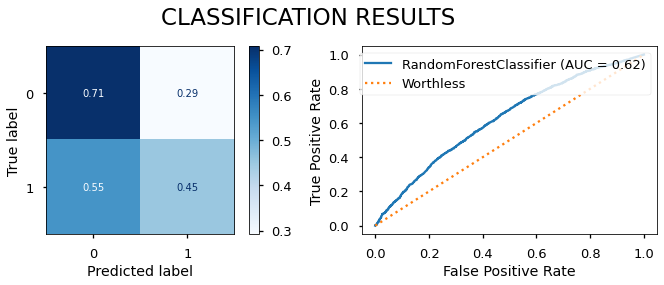

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      4335
           1       0.44      0.45      0.44      2170

    accuracy                           0.62      6505
   macro avg       0.58      0.58      0.58      6505
weighted avg       0.63      0.62      0.62      6505



<AxesSubplot:>

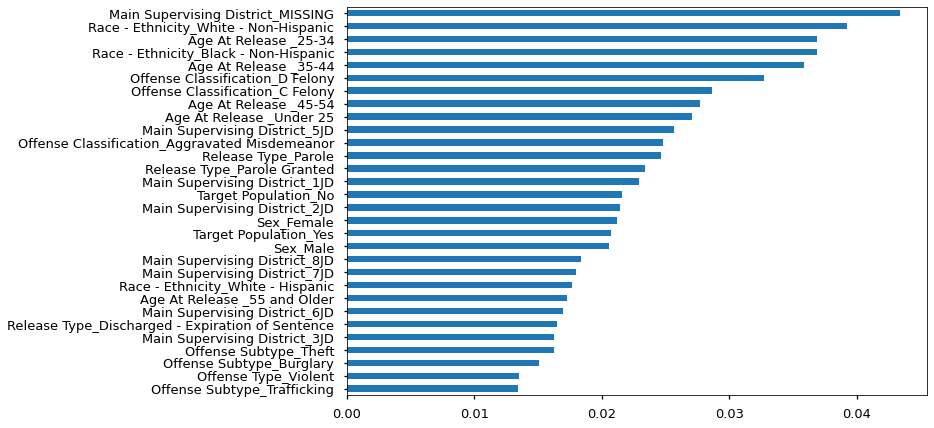

In [35]:
def get_model_results(rf,X_test_tf,y_test, cmap='Blues',
                                 normalize='true',top_n=30):
    """Gets predictions from model and displays:
    - classification report
    - confusion matrix
    - roc-curve
    """
    
    ## Get predictions and evaluate model
    y_hat_test = rf.predict(X_test_tf)


    ## Plot Results
    fig, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
    
    ## Confusion Matrix
    metrics.plot_confusion_matrix(rf,X_test_tf,y_test,
                                  normalize=normalize, cmap=cmap,
                                  ax=ax1)
    
    ## Roc Curve + 45 Degree Line
    metrics.plot_roc_curve(rf, X_test_tf, y_test,ax=ax2)
    ax2.plot([0,1],[0,1],ls=':', label= 'Worthless')
    ax2.legend(loc='upper right')
    
    ## Final Figure Customizing
    fig.suptitle('CLASSIFICATION RESULTS',size=23)
    fig.tight_layout()
    plt.show()
     
    print(metrics.classification_report(y_test, y_hat_test))
    try:
        importance = pd.Series(rf.feature_importances_,
                       index=X_train_tf.columns).sort_values(ascending=True)
        display(importance.tail(top_n).plot(kind='barh'))
    except:
        print('Model importance not available.')


get_model_results(rf,X_test_tf,y_test)

## XGBoostRandomForest

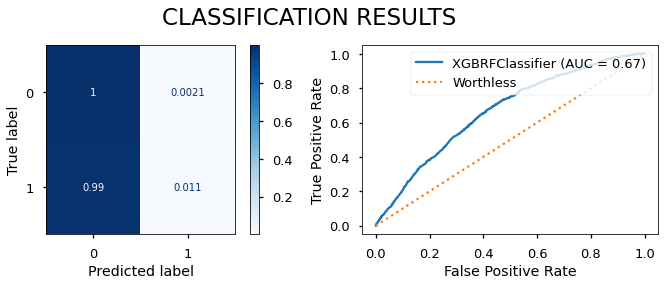

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      4335
           1       0.73      0.01      0.02      2170

    accuracy                           0.67      6505
   macro avg       0.70      0.50      0.41      6505
weighted avg       0.69      0.67      0.54      6505



<AxesSubplot:>

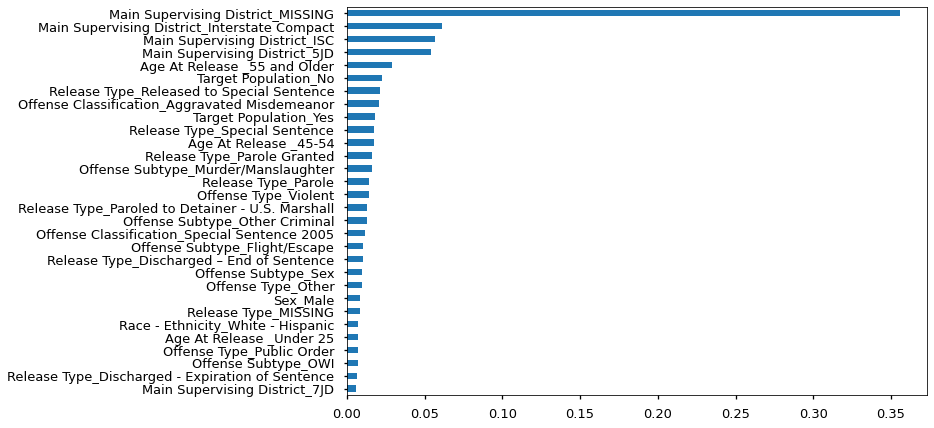

In [36]:
from xgboost import XGBRFClassifier

xgbrf = XGBRFClassifier()
xgbrf.fit(X_train_tf,y_train)

get_model_results(xgbrf,X_test_tf,y_test)

### Support Vector Machines

In [37]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_tf,y_train)

get_model_results(svc,X_test_tf,y_test)

SVC()

# iNTERPRET

## Addressing Class Imbalance with SMOTE

In [45]:
from imblearn.over_sampling import SMOTE, SMOTENC
smote = SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train_tf,y_train)

In [48]:
X_train_smote

,Main Supervising District_1JD,Main Supervising District_2JD,Main Supervising District_3JD,Main Supervising District_4JD,Main Supervising District_5JD,Main Supervising District_6JD,Main Supervising District_7JD,Main Supervising District_8JD,Main Supervising District_ISC,Main Supervising District_Interstate Compact,...,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons,Target Population_No,Target Population_Yes
0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26004,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26005,0.0,0.0,0.0,0.0,0.465914,0.000000,0.534086,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26006,0.0,0.0,0.0,0.0,0.128639,0.871361,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
y_train_smote.value_counts()

1    13004
0    13004
Name: Recidivist, dtype: int64

### RF

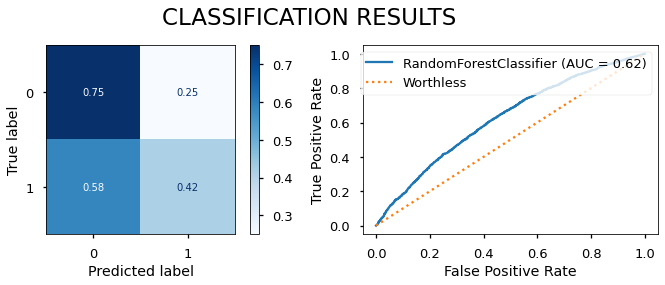

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      4335
           1       0.45      0.42      0.43      2170

    accuracy                           0.64      6505
   macro avg       0.59      0.58      0.58      6505
weighted avg       0.63      0.64      0.63      6505



<AxesSubplot:>

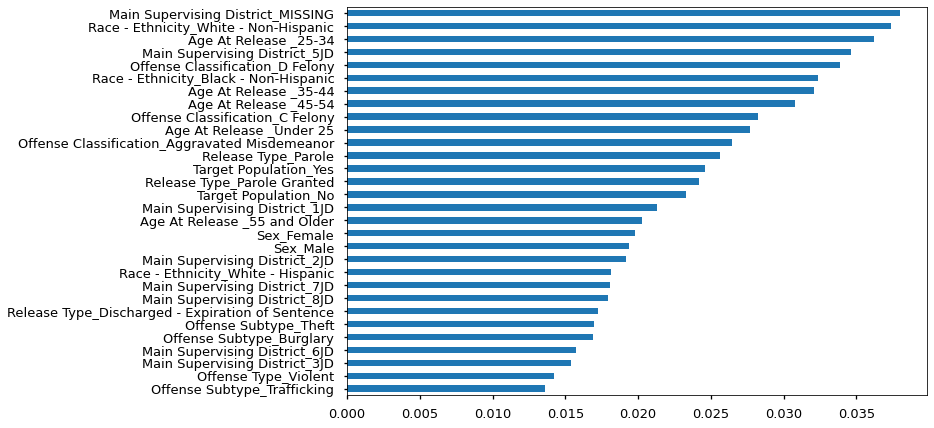

In [52]:
## Make a Ranodom Forest

rf_smote = RandomForestClassifier()#class_weight='balanced')
rf_smote.fit(X_train_smote,y_train_smote)
get_model_results(rf_smote,X_test_tf,y_test)

In [53]:
display(y_test.value_counts(1))

0    0.66641
1    0.33359
Name: Recidivist, dtype: float64

### XGBRF

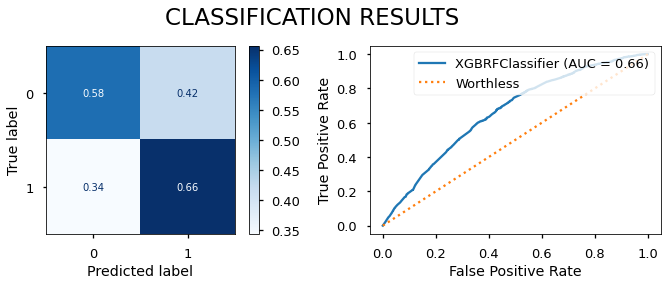

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      4335
           1       0.44      0.66      0.53      2170

    accuracy                           0.61      6505
   macro avg       0.61      0.62      0.60      6505
weighted avg       0.66      0.61      0.62      6505



<AxesSubplot:>

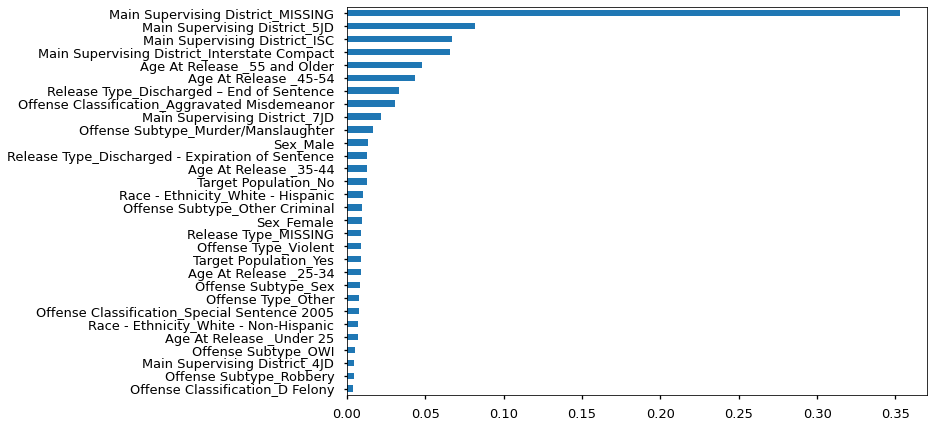

In [54]:
xgbrf = XGBRFClassifier()
xgbrf.fit(X_train_smote,y_train_smote)

get_model_results(xgbrf,X_test_tf,y_test)

In [56]:
y_test.value_counts(1)

0    0.66641
1    0.33359
Name: Recidivist, dtype: float64

### SVM

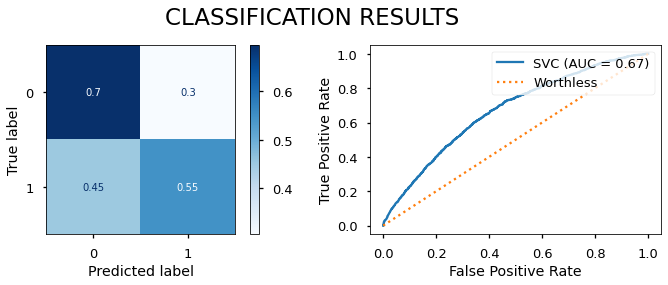

              precision    recall  f1-score   support

           0       0.75      0.70      0.72      4335
           1       0.47      0.55      0.51      2170

    accuracy                           0.65      6505
   macro avg       0.61      0.62      0.62      6505
weighted avg       0.66      0.65      0.65      6505

Model importance not available.


In [57]:

svc = SVC()
svc.fit(X_train_smote,y_train_smote)

get_model_results(svc,X_test_tf,y_test)

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.

# TO DO/FUTURE WORK

- 